# Suicide Rates Prediction 

---
### <span style="color: gray;">Data Description</span>

- ### Features
    * country: The name of the country
    * year: The year for which the no. of suicides were recorded
    * sex: The sex of the victims
    * age: Age range of the victims
    * population: Total population of the country in that year
    * country-year: The features country and year, combined (for whatever reason)
    * HDI for year: The value of the Human Development Index for the country, for that year
    * gdp_for_year (in dollars): The value of the Gross Domestic Product for the country, for that year
    * gdp_per_capita (in dollars): The value of the Gross Domestic Product (per capita) for the country, for that year
    * generation: Something based on the age grouping average (Not clear about what it really is)
- ### Target Variable
    * suicides_no: You have to predict the no. of suicides from the given data, for the given country for the given year.
---

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("rocket")
data = pd.read_csv('Data\\train.csv')
data

,id,country,year,sex,age,suicides_no,population,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,Albania,1987,male,15-24 years,21,312900,Albania1987,NaN,"2,156,624,900",796,Generation X
1,1,Albania,1987,male,35-54 years,16,308000,Albania1987,NaN,"2,156,624,900",796,Silent
2,2,Albania,1987,female,15-24 years,14,289700,Albania1987,NaN,"2,156,624,900",796,Generation X
3,3,Albania,1987,male,75+ years,1,21800,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,4,Albania,1987,male,25-34 years,9,274300,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
18078,18078,Norway,2003,female,35-54 years,45,629033,Norway2003,NaN,"228,752,436,372",53533,Boomers
18079,18079,Norway,2003,female,25-34 years,22,321320,Norway2003,NaN,"228,752,436,372",53533,Generation X
18080,18080,Norway,2003,female,15-24 years,17,269608,Norway2003,NaN,"228,752,436,372",53533,Millenials
18081,18081,Norway,2003,female,75+ years,11,220907,Norway2003,NaN,"228,752,436,372",53533,Silent


In [146]:
data.describe()

,id,year,suicides_no,population,HDI for year,gdp_per_capita ($)
count,18083.000000,18083.000000,18083.000000,1.808300e+04,5616.000000,18083.000000
mean,9041.000000,2001.052314,167.802190,1.445742e+06,0.778370,16945.078416
std,5220.256794,8.465100,523.663271,3.016681e+06,0.093518,17872.517574
min,0.000000,1985.000000,0.000000,2.780000e+02,0.483000,251.000000
25%,4520.500000,1994.000000,2.000000,7.807950e+04,0.717750,3573.000000
50%,9041.000000,2001.000000,20.000000,3.814000e+05,0.784000,10499.000000
75%,13561.500000,2008.000000,111.000000,1.206450e+06,0.857500,25622.000000
max,18082.000000,2016.000000,8948.000000,2.846186e+07,0.935000,126352.000000


In [147]:
print(data.dtypes)

# ' gdp_for_year ($) ' column (which logically is an int number) is interpretated like 'object' because of the commas in the values.
# We need to remove commas and change column type from string to int

data[' gdp_for_year ($) '] = data[' gdp_for_year ($) '].apply(lambda string: int(string.replace(',', '')))

id                      int64
country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object


In [148]:
# Looking for columns with missed values

for col in data.columns:
    print(col, data[col].isnull().sum())
    
# only 'HDI for year' with many NaNs -> delete this column
data.drop('HDI for year', inplace=True, axis=1)

id 0
country 0
year 0
sex 0
age 0
suicides_no 0
population 0
country-year 0
HDI for year 12467
 gdp_for_year ($)  0
gdp_per_capita ($) 0
generation 0


***
Let's count suicide percentage per every country. Analyzing the 'country' column, we see that few countries have very small amount of observation. So, I consider not to count suicide coefficient for countries, which were mentioned less than 50 times in the dataset, but to change it with mean coefficient value.
***

In [149]:
print("Value counts for 'country' column:")
print(data['country'].value_counts().head())
print(data['country'].value_counts().tail(8))

# making array only with countries that were mentioned more than 50 times and separate array whith other few countries
countries_value_counts = dict(data['country'].value_counts())
countries = np.array([key for key in countries_value_counts if countries_value_counts[key] > 50])
countries_left = np.array([key for key in countries_value_counts if countries_value_counts[key] < 50])


# making dictionary with suicide coefficients
frequencies = [round(data[data['country'] == country_name]['suicides_no'].sum() / data[data['country'] == country_name]['population'].sum(), 5) for country_name in countries]
frequencies_dict = dict(zip(countries, frequencies))
frequencies_dict = dict(sorted(frequencies_dict.items(), key = lambda x: x[1], reverse=True))


# calculating mean suicide percentage
coefficient_mean = round(np.array(list(frequencies_dict.values())).mean(), 5)

# adding countries which has been removed earlier
for country in countries_left:
    frequencies_dict[country] = coefficient_mean
    

print("\nSuicide coefficients for each country:")
frequencies_dict


Value counts for 'country' column:
Mauritius      382
Netherlands    382
Iceland        382
Austria        382
Japan          372
Name: country, dtype: int64
Montenegro                120
Maldives                  120
Nicaragua                  72
Bosnia and Herzegovina     24
Dominica                   12
Cabo Verde                 12
Macau                      12
Mongolia                   10
Name: country, dtype: int64

Suicide coefficients for each country:


{'Lithuania': 0.00041,
 'Hungary': 0.0003,
 'Belarus': 0.0003,
 'Latvia': 0.00028,
 'Kazakhstan': 0.00027,
 'Estonia': 0.00026,
 'Finland': 0.00024,
 'Japan': 0.00022,
 'Austria': 0.00021,
 'Belgium': 0.00021,
 'Guyana': 0.00021,
 'France': 0.0002,
 'Croatia': 0.0002,
 'Czech Republic': 0.00017,
 'Bulgaria': 0.00016,
 'Cuba': 0.00016,
 'Luxembourg': 0.00015,
 'New Zealand': 0.00014,
 'Germany': 0.00014,
 'Denmark': 0.00014,
 'Norway': 0.00014,
 'Iceland': 0.00013,
 'Australia': 0.00013,
 'Canada': 0.00013,
 'Mauritius': 0.00012,
 'Ireland': 0.00012,
 'Netherlands': 0.00011,
 'Kyrgyzstan': 0.00011,
 'Chile': 0.0001,
 'El Salvador': 9e-05,
 'Italy': 8e-05,
 'Argentina': 8e-05,
 'Aruba': 8e-05,
 'Montenegro': 8e-05,
 'Israel': 7e-05,
 'Costa Rica': 7e-05,
 'Kiribati': 7e-05,
 'Ecuador': 6e-05,
 'Belize': 6e-05,
 'Nicaragua': 6e-05,
 'Brazil': 5e-05,
 'Colombia': 5e-05,
 'Malta': 5e-05,
 'Greece': 4e-05,
 'Mexico': 4e-05,
 'Cyprus': 4e-05,
 'Fiji': 4e-05,
 'Guatemala': 3e-05,
 'Barbados': 

In [150]:
# adding new column with suicide coefficients for each country

data['country_coef'] = data['country'].map(frequencies_dict)

In [151]:
# adding new column which will represent gender numerically
data['sex_numeric'] = np.where(data['sex'] == 'male', 0, 1)

# adding new column which will represent age numerically (taking only first age value in string)
data['min_age'] = data['age'].apply(lambda string: int(string[:2]) if string[1].isnumeric() else int(string[:1]))

## Exploring generation's values

<img src="generations.jpg" />

In [152]:
print("Unique generation values in the dataset: ", data['generation'].unique())

# Making a numeric column which will represent generation values by age descending
generation_dict = dict(zip(
            ['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z'],
            [6, 5, 4, 3, 2, 1]))

data['generation_numeric'] = data['generation'].map(generation_dict)

Unique generation values in the dataset:  ['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']


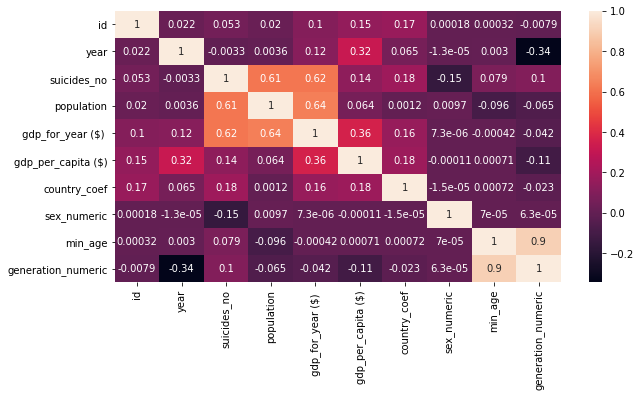

In [153]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot = True)
plt.show()

Male:  0.7415467542324313 %
Female:  0.2584532457675687 %


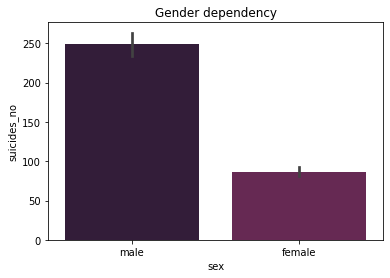

In [154]:
a = data[data['sex_numeric'] == 0]['suicides_no'].sum()
b = data[data['sex_numeric'] == 1]['suicides_no'].sum()

print('Male: ', a / (a + b), '%')
print('Female: ', b / (a + b), '%')

sns.barplot(x='sex',y='suicides_no',data=data)
plt.title('Gender dependency')
plt.show()

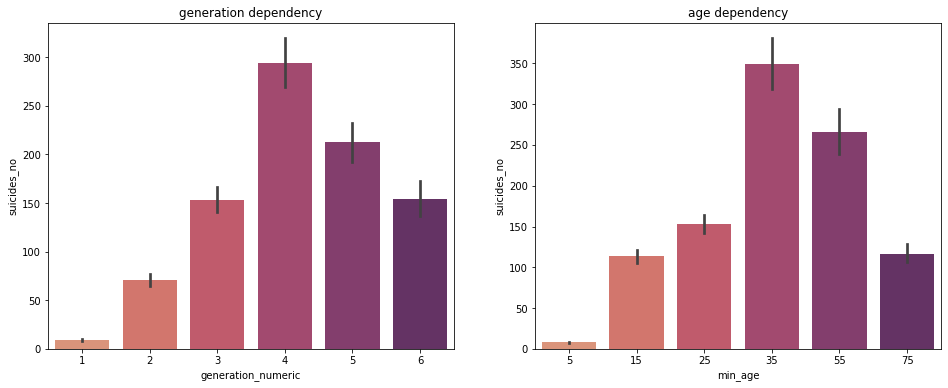

In [155]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
sns.barplot(x='generation_numeric',y='suicides_no', data=data, palette='flare')
plt.title('generation dependency')

plt.subplot(1, 2, 2)
sns.barplot(x='min_age',y='suicides_no', data=data, palette='flare')
plt.title('age dependency')
plt.show()

'generation_numeric' and 'min_age' columns correlate a lot. Also, this is visible on the heatmap.
___
Exploring 'gpd' columns.
Their histograms look like exponential distributions, so I apply np.log() functions to those columns. This way the histograms look more like normal distributions.

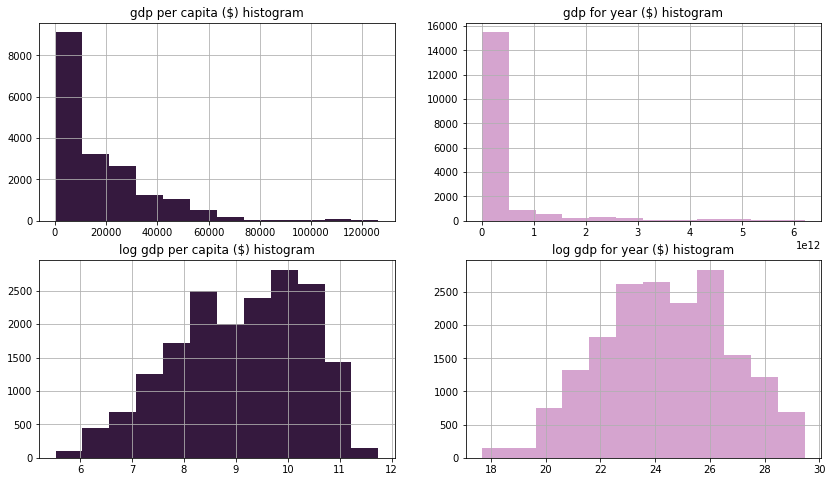

In [156]:
fig = plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
data['gdp_per_capita ($)'].hist(bins=12)
plt.title('gdp per capita ($) histogram')

plt.subplot(2, 2, 2)
data[' gdp_for_year ($) '].hist(color='#d5a4cf', bins=12)
plt.title('gdp for year ($) histogram')

plt.subplot(2, 2, 3)
np.log1p(data['gdp_per_capita ($)']).hist(bins=12)
plt.title('log gdp per capita ($) histogram')

plt.subplot(2, 2, 4)
np.log1p(data[' gdp_for_year ($) ']).hist(color='#d5a4cf', bins=12)
plt.title('log gdp for year ($) histogram')
plt.show()

In [157]:
# Making new columns with log function applied

data['log_gdp_per_capita'] = np.log1p(data[' gdp_for_year ($) '])
data['log_gdp_for_year'] = np.log1p(data['gdp_per_capita ($)'])

## Models building 
### 1.Polynomial Regression

In [158]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = data[['sex_numeric', 'country_coef', 'population', 'log_gdp_for_year', 'log_gdp_per_capita', 'generation_numeric', 'min_age',]]
y = data['suicides_no'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)
X_train, X_test = X_train.copy(), X_test.copy()

poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.transform(X_test)

poly_mdl = LinearRegression().fit(x_train_trans, y_train)
polynomial_predictions = poly_mdl.predict(x_test_trans)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, polynomial_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, polynomial_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, polynomial_predictions)))
print('R2 score:', metrics.r2_score(y_test, polynomial_predictions))

Mean Absolute Error: 88.28762892689639
Mean Squared Error: 35933.88106188338
Root Mean Squared Error: 189.56234083246434
R2 score: 0.8282274319713425


### 2.DecisionTreeRegressor 

In [159]:
from sklearn.tree import DecisionTreeRegressor

tree_mdl = DecisionTreeRegressor(
    criterion='mse', 
    max_depth=10, 
    min_samples_split=10,
    min_samples_leaf=10 
).fit(X_train, y_train)

tree_predictions = tree_mdl.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, tree_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, tree_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, tree_predictions)))
print('R2 score:', metrics.r2_score(y_test, tree_predictions))

Mean Absolute Error: 25.955506377612167
Mean Squared Error: 4720.358578546899
Root Mean Squared Error: 68.70486575597756
R2 score: 0.9774355541040296


### 3.RandomForestRegressor

In [160]:
from sklearn.ensemble import RandomForestRegressor

rf_mdl = RandomForestRegressor(
    n_estimators=50, 
    random_state=2, 
    criterion='mse'
).fit(X_train, y_train)

rf_predictions = rf_mdl.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_predictions)))
print('R2 score:', metrics.r2_score(y_test, rf_predictions))

Mean Absolute Error: 14.261603095632946
Mean Squared Error: 1674.2625764510776
Root Mean Squared Error: 40.917753805054815
R2 score: 0.9919966234146542


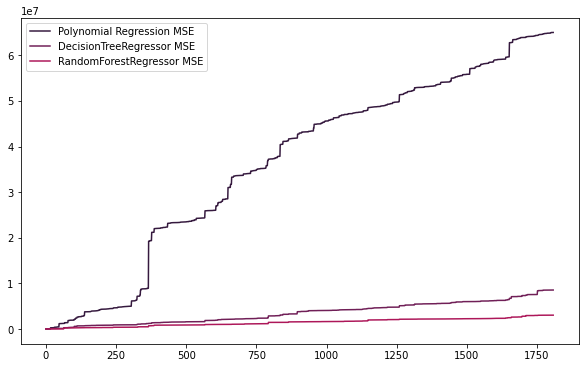

In [161]:
plt.figure(figsize=(10, 6))
poly_mse_array = [metrics.mean_squared_error([a], [b]) for a, b in zip(y_test, polynomial_predictions)]
tree_mse_array = [metrics.mean_squared_error([a], [b]) for a, b in zip(y_test, tree_predictions)]
rf_mse_array = [metrics.mean_squared_error([a], [b]) for a, b in zip(y_test, rf_predictions)]

plt.plot(np.cumsum(poly_mse_array))
plt.plot(np.cumsum(tree_mse_array))
plt.plot(np.cumsum(rf_mse_array))
plt.legend(('Polynomial Regression MSE', 'DecisionTreeRegressor MSE', 'RandomForestRegressor MSE'))
plt.show()

In [162]:
test_data = pd.read_csv('Data\\test.csv')
test_data[' gdp_for_year ($) '] = test_data[' gdp_for_year ($) '].apply(lambda string: int(string.replace(',', '')))

test_data['country_coef'] = data['country'].map(frequencies_dict)
test_data['sex_numeric'] = np.where(test_data['sex'] == 'male', 0, 1)
test_data['min_age'] = data['age'].apply(lambda string: int(string[:2]) if string[1].isnumeric() else int(string[:1]))
test_data['log_gdp_per_capita'] = np.log1p(test_data[' gdp_for_year ($) '])
test_data['log_gdp_for_year'] = np.log1p(test_data['gdp_per_capita ($)'])
test_data['generation_numeric'] = test_data['generation'].map(generation_dict)

In [163]:
final_test_data = test_data[['sex_numeric', 'country_coef', 'population', 'log_gdp_for_year', 'log_gdp_per_capita', 'generation_numeric', 'min_age']]

final_mdl = RandomForestRegressor(
    n_estimators=50, 
    random_state=2, 
    criterion='mse'
).fit(X, y)

test_data['suicides_no'] = final_mdl.predict(final_test_data)

In [164]:
sample = pd.read_csv('Data\\sample_submission.csv')
sample['suicides_no'] = test_data['suicides_no'].astype(int)

In [144]:
# sample.to_csv('final.csv', index=False)